<a href="https://colab.research.google.com/github/johnwu0113/TTU/blob/I4810/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1/ Getting Started: Acquire the data

## Download the dataset.

In [ ]:
# download the Fashion MNIST dataset which is 28x28 size images.
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-12-29 08:36:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 108.177.127.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  38.5MB/s    in 4.3s    

2022-12-29 08:36:05 (33.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-12-29 08:36:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 108.177.127.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

## Unzip images.

In [ ]:
# Unzip images and store them in folder /tmp.
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

 # 2/ Use the ImageGenerator to label and prepare the data

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse21-3.png', 'horse04-7.png', 'horse43-9.png', 'horse19-8.png', 'horse18-2.png', 'horse27-1.png', 'horse17-0.png', 'horse30-8.png', 'horse10-9.png', 'horse48-7.png']
['human04-06.png', 'human01-16.png', 'human16-13.png', 'human03-18.png', 'human12-24.png', 'human13-05.png', 'human02-19.png', 'human17-01.png', 'human11-03.png', 'human11-19.png']


Let's find out the total number of horse and human images in the directories:

In [ ]:
# For Training : Here we have 500 Horse images and 527 Human (Including Mal and Female) images.
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# 3/ Explore the data

## Plot an image.

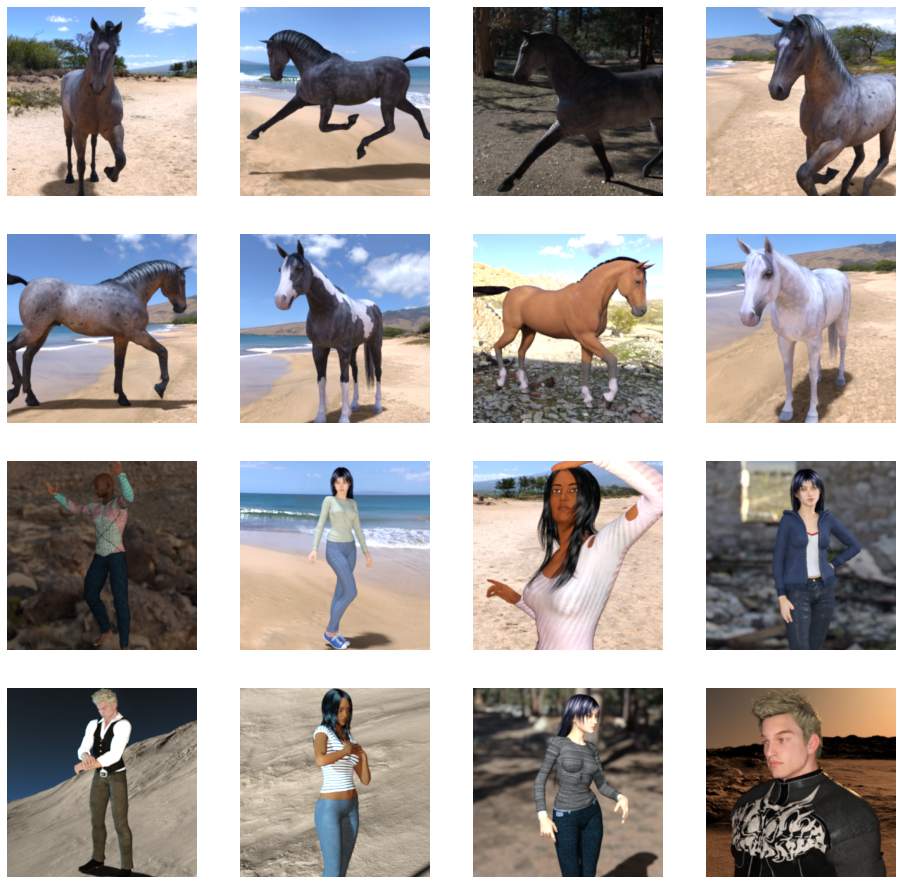

In [ ]:
# Plot an image within 8 horse and 8 human.
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# 4/ Define the model

In [ ]:
try:
  # Note: that %tensorflow_version is only available in Colab and not in regular Python.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Import tensorflow.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


## Add the densely connected layers.

In [ ]:
'''Note that because we are facing a two-class classification problem, i.e. a *binary classification
 problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_
 function), so that the output of our network will be a single scalar between 0 and 1, encoding the 
 probability that the current image is class 1 (as opposed to class 0).
'''

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


## Prints a summary of the NN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

# 5/ Compile the model

In [ ]:
'''
We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.
'''
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# 6/ Do the training

In [ ]:
'''
Let's train for 15 epochs -- this may take a few minutes to run.
Do note the values per epoch.
The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the 
classification of the training data, and then measuring it against the known label, calculating the 
result. Accuracy is the portion of correct guesses. 
'''

history = model.fit(
      train_generator,
      validation_data = validation_generator,  
      epochs=15,
      steps_per_epoch=8,
      validation_steps=8,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 18s 881ms/step - loss: 5.8767 - accuracy: 0.5339 - val_loss: 1.2675 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 923ms/step - loss: 0.6081 - accuracy: 0.6229 - val_loss: 0.4092 - val_accuracy: 0.8516
Epoch 3/15
8/8 [==============================] - 8s 924ms/step - loss: 0.4175 - accuracy: 0.8409 - val_loss: 2.1166 - val_accuracy: 0.6172
Epoch 4/15
8/8 [==============================] - 7s 880ms/step - loss: 0.1502 - accuracy: 0.9444 - val_loss: 1.7634 - val_accuracy: 0.7344
Epoch 5/15
8/8 [==============================] - 7s 1s/step - loss: 0.0487 - accuracy: 0.9855 - val_loss: 1.8135 - val_accuracy: 0.7891
Epoch 6/15
8/8 [==============================] - 7s 902ms/step - loss: 1.8859 - accuracy: 0.8287 - val_loss: 0.9714 - val_accuracy: 0.8359
Epoch 7/15
8/8 [==============================] - 7s 903ms/step - loss: 0.0676 - accuracy: 0.9789 - val_loss: 1.1984 - val_accuracy: 0.8477
Epoch 8/15
8/8 [======

## [Option] Visualization for Accuracy and Loss.

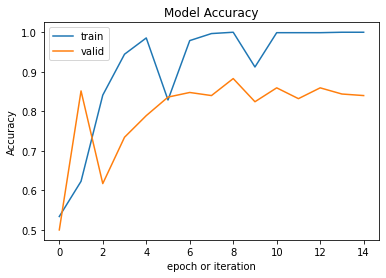

In [ ]:
# Summarize the accuracy.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

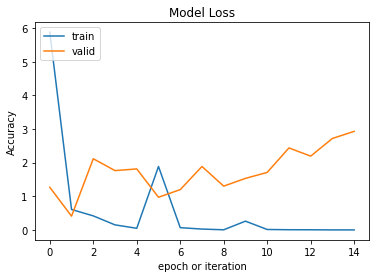

In [ ]:
# Summarize the Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('epoch or iteration')
plt.legend(["train", 'valid'], loc = 'upper left')
plt.show()

# 7/ Test the model

## Upload testing file

In [ ]:
import numpy as np
from google.colab import files
from keras.utils import image_utils

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image_utils.load_img(path, target_size=(300, 300))
  x = image_utils.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving 7.jpg to 7.jpg
1/1 [==============================] - 0s 204ms/step
[0.00143743]
7.jpg is a horse


## [Option] Testing from batch files with picture

In [ ]:
# download testing images
!gdown https://drive.google.com/uc?id=1NruTnQ_9M9T5J5jsDBdYmdS6fkqyj2Jy -O ./test-images.zip

Downloading...
From: https://drive.google.com/uc?id=1NruTnQ_9M9T5J5jsDBdYmdS6fkqyj2Jy
To: /content/test-images.zip
100% 1.31M/1.31M [00:00<00:00, 161MB/s]


In [ ]:
import os
import zipfile

# unzip testing images 
local_zip = './test-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

zip_ref.close()


1/1 [==============================] - 0s 17ms/step
[1.402328e-32]
7.jpg is a horse


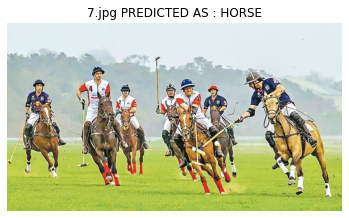

1/1 [==============================] - 0s 16ms/step
[1.6923005e-11]
7.jpg is a horse


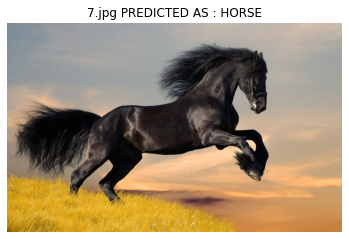

1/1 [==============================] - 0s 16ms/step
[6.104728e-07]
7.jpg is a horse


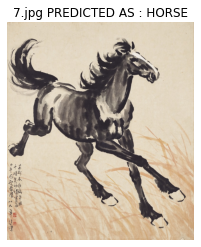

1/1 [==============================] - 0s 15ms/step
[0.]
7.jpg is a horse


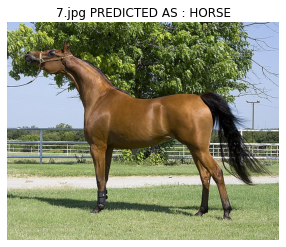

1/1 [==============================] - 0s 17ms/step
[0.00143743]
7.jpg is a horse


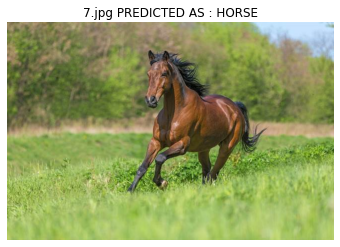

1/1 [==============================] - 0s 17ms/step
[1.181958e-05]
7.jpg is a horse


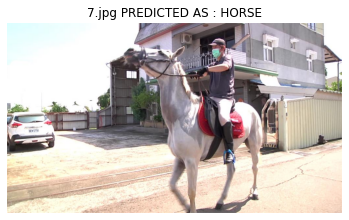

1/1 [==============================] - 0s 17ms/step
[1.384633e-16]
7.jpg is a horse


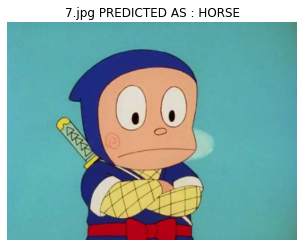

1/1 [==============================] - 0s 26ms/step
[8.5345897e-07]
7.jpg is a horse


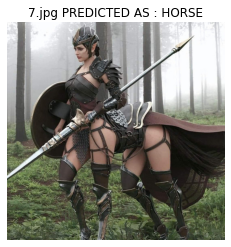

1/1 [==============================] - 0s 18ms/step
[1.]
7.jpg is a human


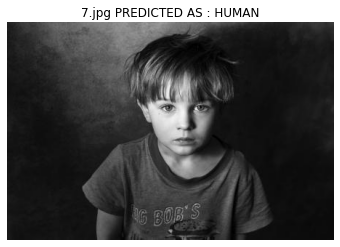

1/1 [==============================] - 0s 15ms/step
[9.913712e-07]
7.jpg is a horse


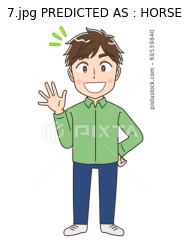

1/1 [==============================] - 0s 15ms/step
[0.9999964]
7.jpg is a human


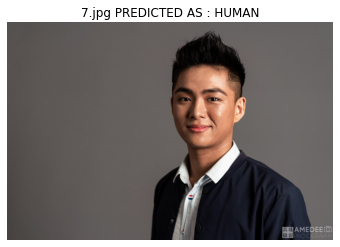

1/1 [==============================] - 0s 29ms/step
[0.72966087]
7.jpg is a human


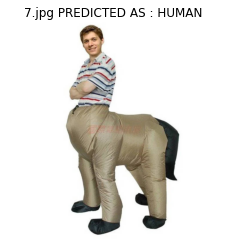

In [ ]:
import cv2
# test_files = list()
for dirname, _, filenames in os.walk('./test-images/'):
    for f in filenames:
        test_image = os.path.join(dirname, f)
        #test_files.append(os.path.join(dirname, f)) 
        img = image_utils.load_img(test_image, target_size=(300, 300))
        x = image_utils.img_to_array(img)
        x = x / 255
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        print(classes[0])

        if classes[0]>0.5:
          print(fn + " is a human")
          prediction = fn + " PREDICTED AS : HUMAN"
        else:
          print(fn + " is a horse")
          prediction = fn + " PREDICTED AS : HORSE"
        img = cv2.imread(test_image)
        img_array = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #plt.imshow(img_array, cmap = 'gray')
        
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(prediction)
    
        plt.show()

# 8/ Visualize intermediate representations

1/1 [==============================] - 0s 69ms/step


<ipython-input-21-41cc73d32ff1>:44: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


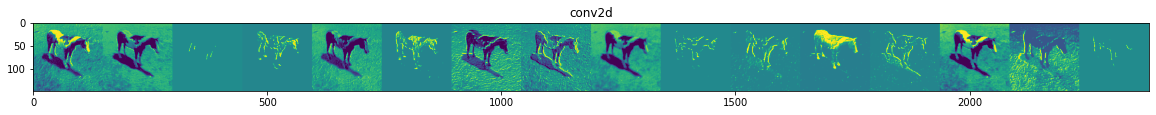

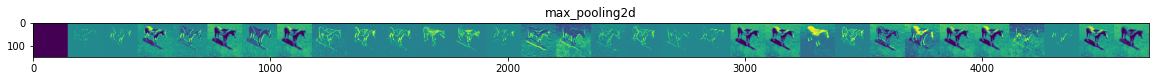

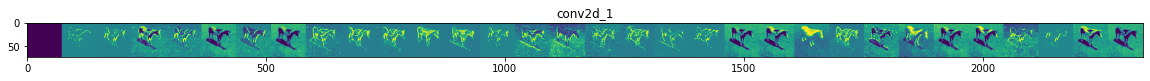

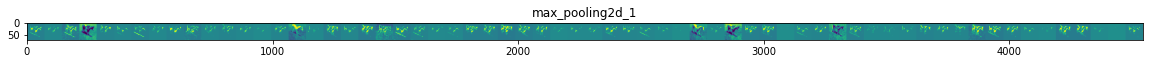

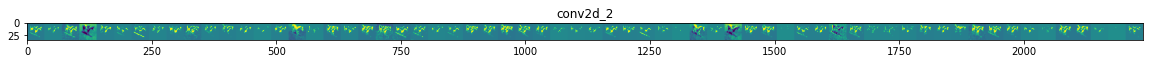

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      #if x>0:
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

# 9/ [Option] Clean Up

In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)